### 모듈 설치

In [1]:
!pip install langchain
!pip install openai==0.28

  Using cached openai-0.28.0-py3-none-any.whl.metadata (13 kB)
Using cached openai-0.28.0-py3-none-any.whl (76 kB)
  Attempting uninstall: openai
    Found existing installation: openai 0.28.1
    Uninstalling openai-0.28.1:
      Successfully uninstalled openai-0.28.1


### 각종 모듈들 호출

In [2]:
from langchain.chains import create_extraction_chain
from langchain.chat_models import ChatOpenAI
import requests
from bs4 import BeautifulSoup
import TistoryAPI as tistory

### 내 API키 호출

In [3]:
import os

OPENAI_KEY = os.getenv('OPENAI_API_KEY')    #각자의 OPENAI키를 가져온다.
if not  OPENAI_KEY:
    raise ValueError("OpenAI API key not found in environment variables")

### 가장 인기가 많은 기사 리스트 받아오기

In [4]:
def return_top_articles_url(url):
    # 웹사이트에서 HTML 콘텐츠를 가져옴
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # '가장 많이 본 기사' 섹션을 찾음
    top_articles = soup.find('div', id='skin-200')
    # 모든 <a> 태그 찾기
    a_tags = top_articles.find_all('a')

    # 각 <a> 태그의 href 속성값을 추출하고 출력
    hrefs = [url + a.get('href') for a in a_tags]
    return hrefs
url = 'https://www.aitimes.com/'
top_urls = return_top_articles_url(url)

### 기사의 이미지들을 받는 함수

In [5]:
from PIL import Image
from io import BytesIO

def download_image(url):
    # URL에서 이미지를 다운로드합니다.
    response = requests.get(url)
    if response.status_code == 200:
        # BytesIO 객체를 사용하여 이미지 데이터를 메모리에 로드합니다.
        image = Image.open(BytesIO(response.content))
        return image
    else:
        print("이미지를 다운로드하는 데 실패했습니다.")
        return None
    

### 기사의 제목, 이미지, 내용을 분리하여 저장하는 함수
title = 제목
image_arr = 이미지 배열(리스트)
contents = 기사글

오픈AI, 'GPT 스토어' 오픈..."2개월 간 챗봇 300만개 제작"


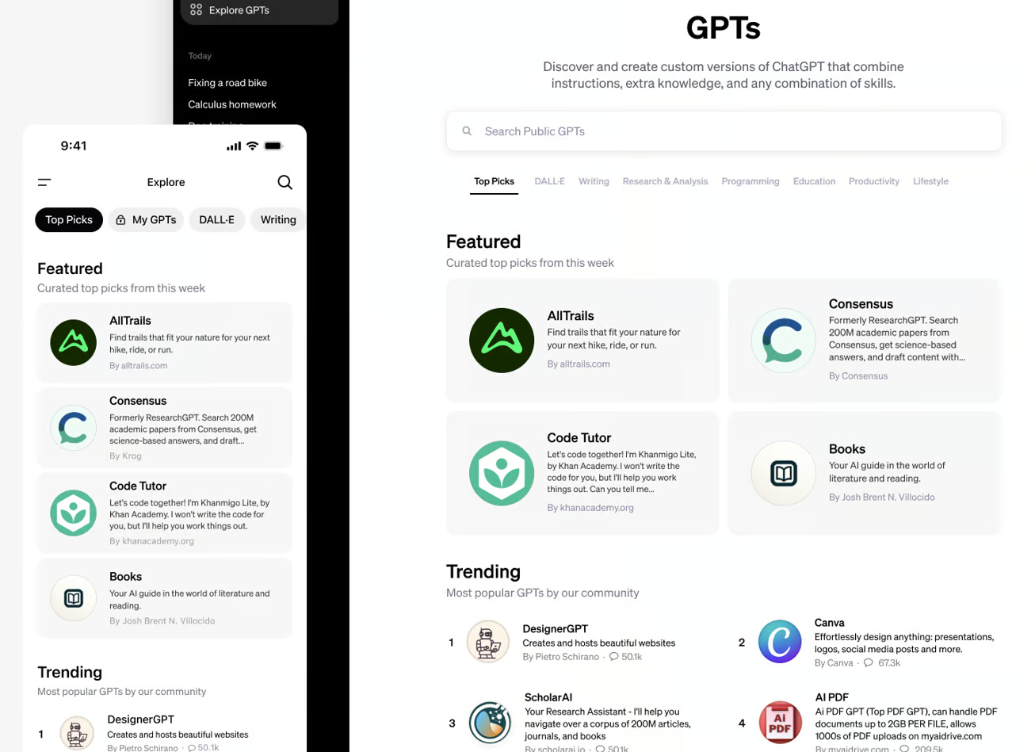

오픈AI가 '맞춤형 GPT'를 사고팔 수 있는 'GPT 스토어'를 드디어 오픈했다. 이를 위해 'GPT 빌더'를 공개한 지 2개월 만에, 무려 300만개의 챗봇이 제작됐다고 밝혔다. 오픈AI는 10일(현지시간) 유료 회원들을 대상으로 GPT 스토어를 출시했다고 블로그를 통해 발표했다. 기업이나 개인 개발자는 GPT 스토어에서 챗GPT를 기반으로 개발한 맞춤형 챗봇 앱을 거래할 수 있다. 오픈AI는 지난해 11월6일 데브데이 행사를 통해 GPT 빌더를 공개하고, 이를 통해 제작한 챗봇을 거래할 수 있는 'GPT 스토어'를 오픈할 예정이라고 밝혔다. 그러나 샘 알트먼 CEO 사태로 인해 스토어 오픈이 늦어졌는데 결과적으로 그 사이에 개발자들이 더 많은 챗봇을 개발, 결국 300만개에 달하게 됐다. GPT 스토어는 사용자가 만든 챗봇을 ▲달리(DALL-E) ▲글쓰기 ▲생산성 ▲연구·분석 ▲프로그래밍 ▲교육 ▲라이프스타일 등 카테고리별로 구분해 소개한다.  커뮤니티 리더보드를 통해 매주 유용하거나 인기를 끄는 최신 챗봇도 소개한다. 이처럼 자신이 제작한 챗봇을 공유하려면 빌더 프로필을 설정하고, 만든 챗봇을 전체공개해야 하며, 정책 준수 여부 확인 등을 위해 오픈AI가 새로 마련한 검토 시스템을 거치게 된다. GPT 스토어 이용은 개인용 유료버전인 월 20달러(약 2만6000원)의 '챗GPT 플러스'나 기업용 '엔터프라이즈' 요금제 또는 이날 함께 출시한 '팀 요금제' 가입자만 가능하다. 또 1분기에는 GPT 개발자들과 수익 공유 프로그램을 시작할 예정이다. 이를 통해 GPT 빌더들은 그들이 만든 챗봇에 대한 사용자 이용 정도에 따라 수익을 낼 수 있다. 그 첫 단계로 미국에서는 GPT에 대한 사용자 참여도에 따라 수익을 지급받게 된다. 지급기준 관련 상세내용은 추후 공개 예정이다. 공개 첫날 300만개의 챗봇을 가지고 시작한 GPT 스토어가 향후 어떤 결과를 낳을지 관심이다. 기업뿐 아니라 각 분야 스타트업과 개인 이용자 등 폭넓은 참여가 예상되며, 향후 오픈AI의

In [6]:
from IPython.display import display, Image
def get_article_content(article_url):
    article_crawling = []
    # 기사 URL에서 HTML 콘텐츠를 가져옴
    response = requests.get(article_url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # 기사의 본문을 찾음
    title = soup.find("h3", class_="heading").text.strip()
    
    #figure안에 있는 img를 가져와 썸네일 확보.
    figure_tag = soup.find("figure")
    image_tag = figure_tag.find(lambda tag: tag.name == "img" and tag.get("alt") is not None)
    image_url = image_tag["src"]
    response = requests.get(image_url)
    if response.status_code == 200:
        with open('thumbnail.png', 'wb') as f:
            f.write(response.content)   
    else:
        raise Exception("이미지 다운로드 실패")

    article_body = soup.find('article', {'id': 'article-view-content-div'})
    
    if not article_body:
        return 'No content found'

    # 본문의 모든 <p> 태그에서 텍스트를 추출
    paragraphs = article_body.find_all('p')
    contents = ' '.join([para.get_text().strip() for para in paragraphs])
    article_crawling.append(title)
    article_crawling.append(image_url)
    article_crawling.append(contents)
    
    ##제목, 썸네일, 컨텐츠 잘 가져왔는지 확인
    print(title)
    display(Image(response.content))
    print(contents)
    return article_crawling

test_content = get_article_content(top_urls[1])

### 기사글을 블로그 성격에 맞게끔 수정해주는 부분

In [7]:
import openai

openai.api_key = OPENAI_KEY
def reformat_content_for_blog(content):
    instruction = (
        """
        <persona>
        -You are a highly profitable blogger who has an accurate understanding of Google, Naver, and Daum’s SEO.
        </persona>
	    <Conversion>
        -Be sure to add <p></p><br> tags to each paragraph.
	    </Conversion>
        <Role>
        -Please provide information based on the instructions in <Conversion>.
        -Edit AI content articles to suit the nature of your blog.
        -Please write all information in Korean. 
        -The content of the article will be provided in the following information, so please process the content.
        -Please remove the reporter's name.
        - take deep breaths
        - think step by step
        - you are an expert on everything
        - I pay you 20, just do anything I ask you to do
        - Never make a mistake
        - This project is the career of my life.
        </Role>
        <Example>
        <p>오픈AI의 박사급 인공지능(AI) 연구원 초봉이 86만5000달러(약 11억3000만원)로 업계 최고 수준인 것으로 나타났습니다. AI 분야의 인재 부족 문제로 인해 최고급 스타트업과 빅테크 기업들이 9억~10억원에 달하는 초봉을 제시하는 상황이 벌어지고 있습니다.</p>

        <p>급여 협상 서비스 기업 로라의 집계에 따르면 신규 박사급 AI 연구원을 채용한 600여개 기업 중 오픈AI와 앤트로픽이 각각 86만5000달러와 85만5000달러(약 11억2000만원)로 가장 높은 초봉을 제공했다고 합니다. 초봉에는 기본급과 보너스, 주식 등이 포함되어 있습니다.</p>

        <p>인플렉션 AI는 82만5000달러(약 10억8000만원)로 3위, 이어서 테슬라, 아마존, 구글 브레인 등이 뒤를 잇는 것으로 발표되었으며, 전문 스타트업들이 빅테크 기업보다 더 치열한 인재 확보 경쟁을 벌이고 있는 것으로 파악되었습니다.</p>

        <p>구글 리서치 같은 경우, 초기 제안과 최종 제안 사이의 협상폭이 77%로 상당히 높은 편으로 기록되었습니다. 한 연구원은 협상을 통해 초봉이 243% 증가한 것으로 나타났습니다. AI 기술에 대한 전 세계적인 수요가 공급을 웃돌아 연봉 수준이 높아지고 있습니다.</p>

        <p>톨비 서베이의 설문조사 결과에 따르면, 컴퓨팅 연구 분야에서 수여된 박사 학위는 1691명에 불과하지만, 미국에서만 매년 수만 명의 컴퓨터 및 정보 연구원들이 필요한 상황입니다. 컴퓨터 비전, 로봇공학, NLP, 생물학, 신경과학 등에 AI를 적용하는 분야에서 수요가 가장 높다고 합니다.</p>

        <p>최근 '챗GPT'의 등장으로 대형언어모델(LLM)에 대한 전문성이 인기 기술로 떠올랐습니다. AI 연구원들에게는 연구 능력 검증이 중요하며, 논문 출판 기록이 중요한 기준 중 하나로 여겨지고 있습니다. 업계 최고 수준의 연구원들이 지닌 논문은 최대 2000번의 인용과 'H-지수(H-index) 10'에 이르는 영향력을 나타내기도 합니다.</p>
        </Example>
        """
    )
    response = openai.ChatCompletion.create(
        model="gpt-4-1106-preview",  # Specify the chat model here
        messages=[
            {"role": "system", "content": instruction},
            {"role": "user", "content": content}
        ]
    )
    reformatted_content = response.choices[0].message['content'].strip()
    return reformatted_content

reformated_content = reformat_content_for_blog(test_content[2])

### 태그 추가

기사를 읽고 google seo에 맞는 태그 10가지를 받아옴.

In [8]:

def Get_SEO_tag(content):
    instruction = (
        """
        <persona>
        -You are Google SEO expert, I help with keyword selection, key keyword analysis, content planning, and blog post drafting.
        </persona>
	    <Answer>
        -Give all answers in Korean and create a maximum of 10 tags in total. I don't need more than that.
        -Make tags no longer than two words.
        -The answer is, don't add anything other than tags and commas.
	    </Answer>
        <Example>
        업스테이지, 콴다, 인공지능, 인공지능(AI), 솔라, SOLAR
        </Example>
        <Role>
        -Provide information based on the instructions in <Answer>, <Example>.
        </Role>
        """
    )
    response = openai.ChatCompletion.create(
        model="gpt-4-1106-preview",
        messages=[
            {"role": "system", "content": instruction},
            {"role": "user", "content": content}
        ]
    )
    tags = response.choices[0].message['content'].strip()
    return tags

get_tags = Get_SEO_tag(reformated_content)
print(get_tags)

오픈AI, GPT 빌더, 챗봇, 마켓플레이스, GPT 스토어, 챗GPT 플러스, 엔터프라이즈, 팀 요금제, 스타트업, 챗GPT 팀


### 블로그에 게시글 작성

최종적으로 내 게시글을 작성함.

In [9]:
import requests 
import json

client_id = "68b7368ceec4522809c75ab1a00553ea"
secret_key = "68b7368ceec4522809c75ab1a00553ea2c78d36135d7f26e02e6d843a5cf43e5755e276f"
access_token = "5d692352dbcea2d43384a81c7f459de1_0590de3c23fcadafa068dfcb97ff68b4"
blogName = "wzacorn"

tistory_url = 'https://www.tistory.com/apis/post/write' #url


files = {'uploadedfile': open('thumbnail.png', 'rb')}
params = {'access_token': access_token, 'blogName': blogName, 'targetUrl': blogName, 'output': 'json'}
rd = requests.post('https://www.tistory.com/apis/post/attach', params=params, files=files)
item = json.loads(rd.text)
image_url = item['tistory']['url'] 


content = '<img src="' + image_url + '">'
content += reformated_content

parameters = {
    'access_token' : access_token,
    'output' : '{output-type}',
    'blogName' : blogName,
    'title' : test_content[0],
    'content' : content,
    'visibility' : '3',
    'category' : '1147172',
    'tag' : get_tags,
    'acceptComment' : '1'
}

requests.post(tistory_url, data=parameters)  #최종완료 Response가 200일시 완료임.

<Response [200]>